In [8]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # A nice aesthetic style for plots

# Machine learning libraries from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve

# Imbalanced-learn for handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline # To combine steps easily

In [9]:
# Load the dataset
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Make sure the file is in the correct directory.")
    exit() # Exit if the file isn't found

Dataset loaded successfully!



--- First 5 rows of the dataset ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010

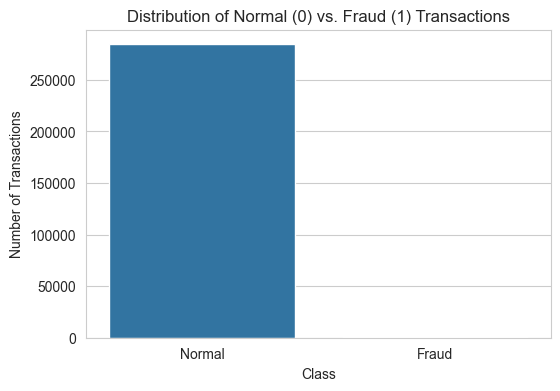

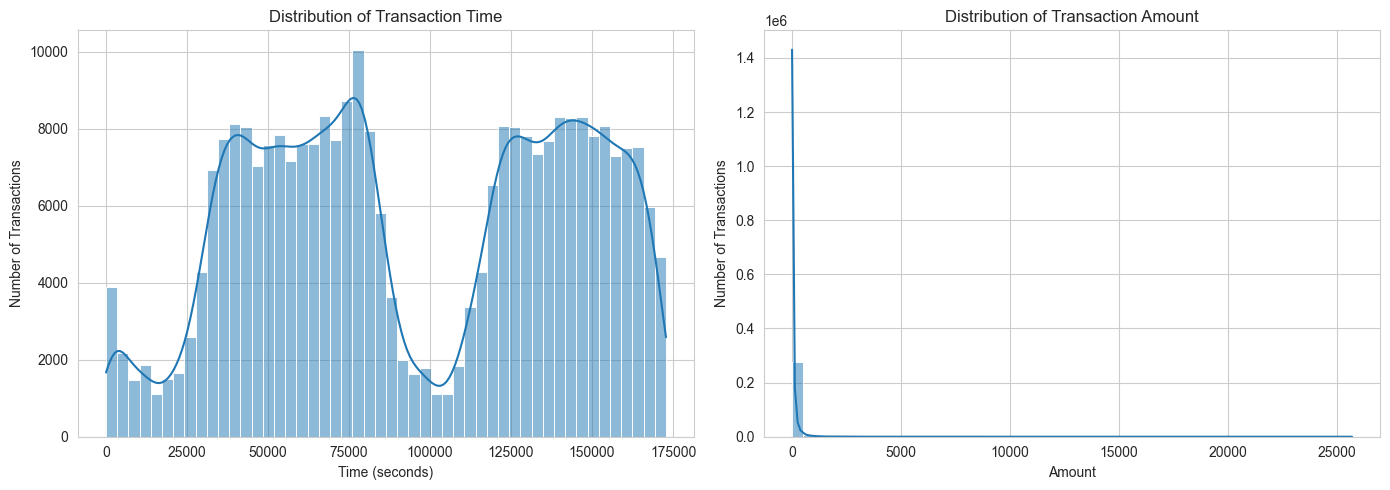

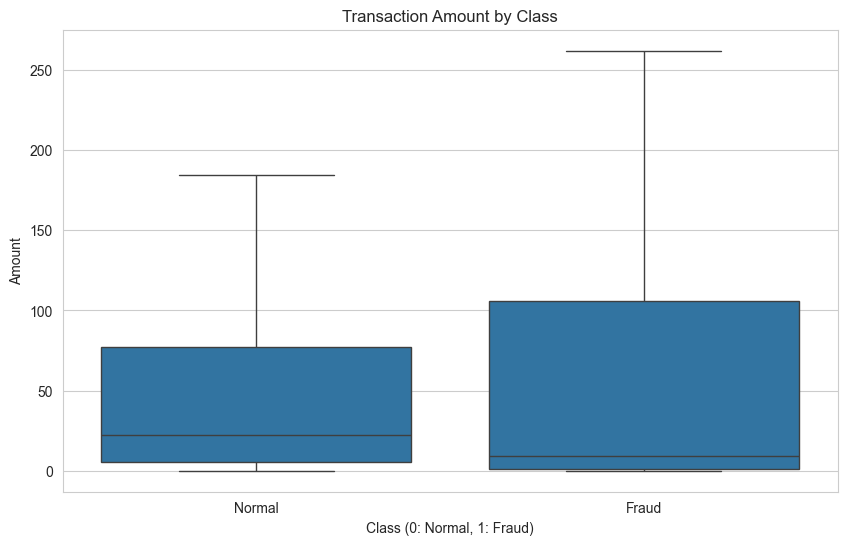

In [10]:
# Display the first 5 rows of the DataFrame
print("\n--- First 5 rows of the dataset ---")
print(df.head())

# Get a concise summary of the DataFrame (data types, non-null values)
print("\n--- Dataset Info ---")
df.info()

# Get descriptive statistics of numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())
# Good news: This dataset typically has no missing values!

# Check the distribution of the 'Class' variable (0: Normal, 1: Fraud)
print("\n--- Class Distribution ---")
print(df['Class'].value_counts())
print("\n--- Class Distribution (Normalized) ---")
print(df['Class'].value_counts(normalize=True) * 100)

# Visualize the Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal (0) vs. Fraud (1) Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

# Visualize the 'Time' and 'Amount' features
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Time'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Number of Transactions')

sns.histplot(df['Amount'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

# Observe the distribution of 'Amount' for fraudulent vs. normal transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False) # showfliers=False to avoid extreme outliers distorting view
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

# Important: Most features (V1-V28) are already PCA transformed.
# This means their original meaning is obscured, but they are numerical and scaled.
# We mostly need to focus on 'Time', 'Amount', and 'Class'.

In [11]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1) # All columns except 'Class'
y = df['Class'] # Only the 'Class' column

# Scale 'Time' and 'Amount' features
# PCA components (V1-V28) are already scaled.
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X['Time'] = scaler.fit_transform(X[['Time']])

print("\n--- X after scaling 'Time' and 'Amount' ---")
print(X.head())

# Split the data into training and testing sets
# We use stratify=y to ensure that the proportion of fraud cases is the same in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n--- Class Distribution in Training Set ---")
print(y_train.value_counts(normalize=True) * 100)
print("\n--- Class Distribution in Test Set ---")
print(y_test.value_counts(normalize=True) * 100)


--- X after scaling 'Time' and 'Amount' ---
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25  

In [12]:
print("\n--- Handling Imbalanced Data with SMOTE ---")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nOriginal training set class distribution: {y_train.value_counts()}")
print(f"Resampled training set class distribution (SMOTE): {y_train_resampled.value_counts()}")

# You can also use RandomUnderSampler, but SMOTE is often preferred as it doesn't lose information.
# If you want to try RandomUnderSampler:
# rus = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
# print(f"Resampled training set class distribution (RandomUnderSampler): {y_train_resampled.value_counts()}")


--- Handling Imbalanced Data with SMOTE ---

Original training set class distribution: Class
0    227451
1       394
Name: count, dtype: int64
Resampled training set class distribution (SMOTE): Class
0    227451
1    227451
Name: count, dtype: int64


In [13]:
print("\n--- Training a Logistic Regression Model ---")

# Initialize the Logistic Regression model
# class_weight='balanced' is another way to handle imbalance, often used instead of explicit resampling
# if you don't use SMOTE or RUS. Since we're using SMOTE, we can remove it, but keeping it can sometimes help.
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

print("Logistic Regression Model trained!")


--- Training a Logistic Regression Model ---
Logistic Regression Model trained!



--- Model Evaluation ---
Accuracy: 0.9742
Precision: 0.0580
Recall: 0.9184
F1-Score: 0.1092
ROC-AUC Score: 0.9699

--- Confusion Matrix ---
[[55403  1461]
 [    8    90]]


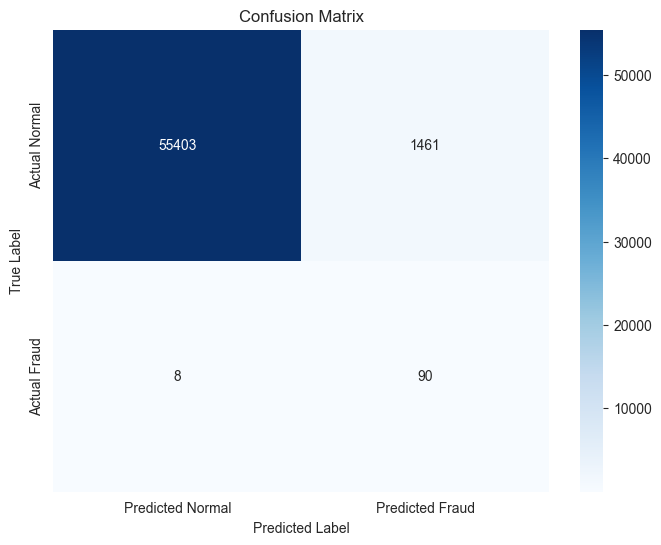

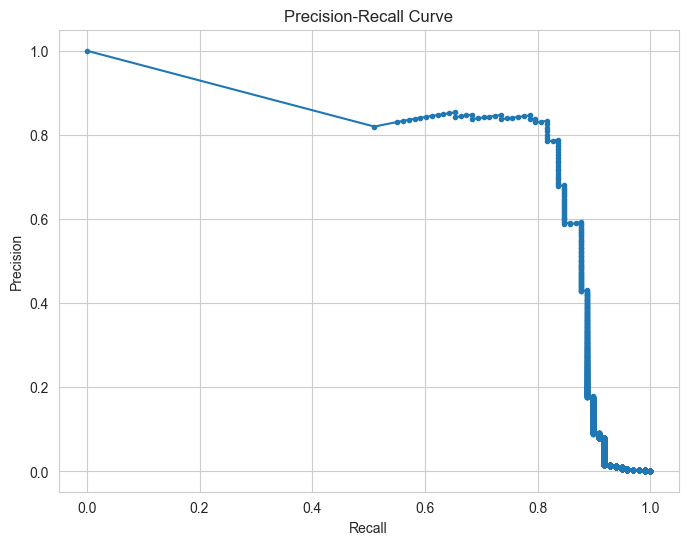

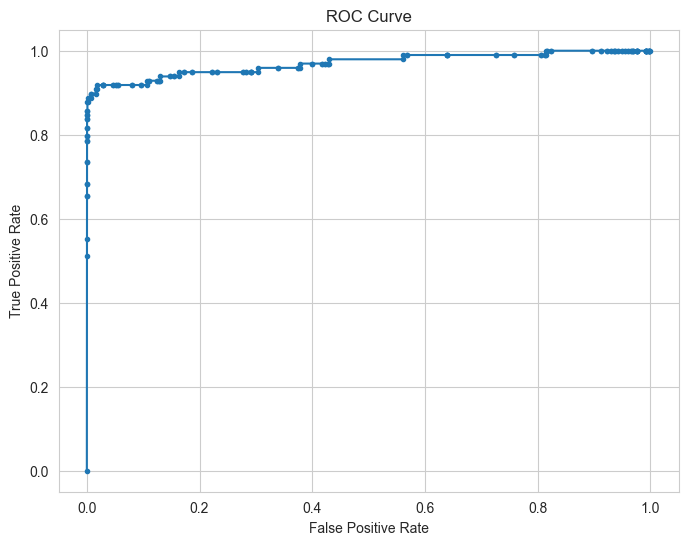

In [14]:
print("\n--- Model Evaluation ---")

# Make predictions on the *original* (unresampled) test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability of being class 1 (fraud)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix: The most important metric for imbalanced data
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Interpretation of Confusion Matrix:
# TN (True Negatives): Top-left - Correctly predicted normal transactions.
# FP (False Positives): Top-right - Incorrectly predicted normal as fraud (Type I error).
# FN (False Negatives): Bottom-left - Incorrectly predicted fraud as normal (Type II error - BIG PROBLEM!).
# TP (True Positives): Bottom-right - Correctly predicted fraud transactions.

# Precision-Recall Curve (Very important for imbalanced datasets)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# ROC Curve (Also useful)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()


--- Experimenting with other models ---

Training Logistic Regression...
--- Logistic Regression Results ---
Accuracy: 0.9742
Precision: 0.0580
Recall: 0.9184
F1-Score: 0.1092
ROC-AUC: 0.9699
Confusion Matrix:
[[55403  1461]
 [    8    90]]


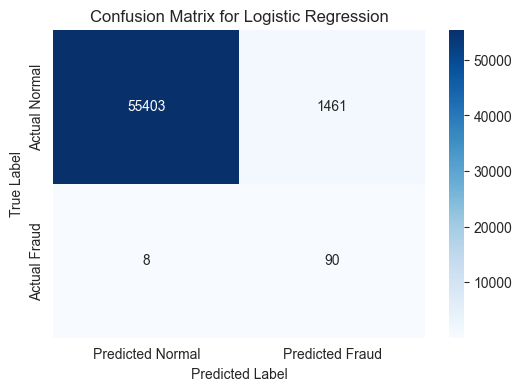


Training Decision Tree...
--- Decision Tree Results ---
Accuracy: 0.9970
Precision: 0.3408
Recall: 0.7755
F1-Score: 0.4735
ROC-AUC: 0.8865
Confusion Matrix:
[[56717   147]
 [   22    76]]


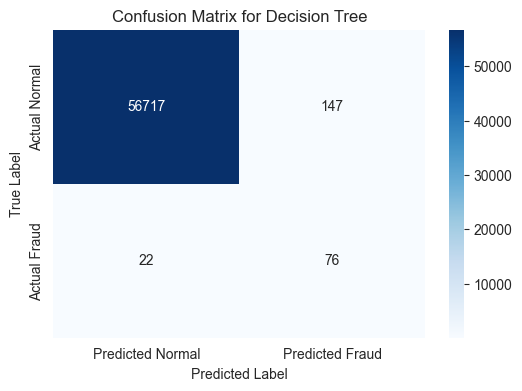


Training Random Forest...
--- Random Forest Results ---
Accuracy: 0.9995
Precision: 0.8454
Recall: 0.8367
F1-Score: 0.8410
ROC-AUC: 0.9731
Confusion Matrix:
[[56849    15]
 [   16    82]]


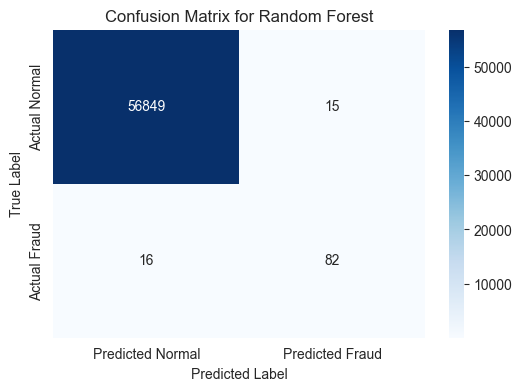


--- Summary of Model Performances ---

Logistic Regression:
  Accuracy: 0.9742
  Precision: 0.0580
  Recall: 0.9184
  F1-Score: 0.1092
  ROC-AUC: 0.9699

Decision Tree:
  Accuracy: 0.9970
  Precision: 0.3408
  Recall: 0.7755
  F1-Score: 0.4735
  ROC-AUC: 0.8865

Random Forest:
  Accuracy: 0.9995
  Precision: 0.8454
  Recall: 0.8367
  F1-Score: 0.8410
  ROC-AUC: 0.9731


In [15]:
print("\n--- Experimenting with other models ---")

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    # Train on resampled data (SMOTE)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"--- {name} Results ---")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    # Display confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Normal', 'Predicted Fraud'],
                yticklabels=['Actual Normal', 'Actual Fraud'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# You can compare the results dictionary to see which model performed best
print("\n--- Summary of Model Performances ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")